In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import re
import pickle
import seaborn as sns

In [3]:
hotstar_train_path = './data/train_data.json'

In [12]:
ht_dt = pd.read_json(hotstar_train_path,orient='index')

In [13]:
train_data = pd.DataFrame() #dataframe to save processed data

In [101]:
#compute watch count
def wcount(p): 
    return p.count(',')+1

In [15]:
#calculating count for columns

train_data['title_count'] = ht_dt['titles'].map(wcount)
train_data['genres_count'] = ht_dt['genres'].map(wcount)
train_data['cities_count'] = ht_dt['cities'].map(wcount)
train_data['tod_count'] = ht_dt['tod'].map(wcount)
train_data['dow_count'] = ht_dt['dow'].map(wcount)

In [18]:
train_data.head()
#need to scale before modelling

,title_count,genres_count,cities_count,tod_count,dow_count
train-1,60,3,2,14,7
train-10,70,2,3,16,7
train-100,2,2,1,3,1
train-1000,8,2,3,6,5
train-10000,11,3,2,9,5


In [28]:
ht_dt['g1'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in ht_dt['genres']]

In [29]:
ht_dt['g1'] = ht_dt['g1'].apply(lambda x: x.split(','))

In [30]:
t1 = pd.Series(ht_dt['g1']).apply(frozenset).to_frame(name='t_genre')

In [32]:
for t_genre in frozenset.union(*t1.t_genre):
    t1[t_genre] = t1.apply(lambda _: int(t_genre in _.t_genre), axis=1)

In [34]:
t1["Sports"] = t1.Boxing + t1.Hockey + t1.FormulaE + t1.Cricket + t1.Football + t1.Tennis + t1.Kabaddi + t1.IndiaVsSa + t1["Table Tennis"] + t1.Volleyball + t1.Athletics + t1.Swimming + t1.Formula1 + t1.Badminton + t1.Sport

In [36]:
t1.head()

,t_genre,Cricket,Tennis,Comedy,Swimming,Athletics,Wildlife,Science,Family,Kabaddi,...,Boxing,Table Tennis,Hockey,Romance,TalkShow,NA,LiveTV,Volleyball,Sport,Sports
train-1,"(Kabaddi, Reality, Cricket)",1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
train-10,"(Wildlife, Cricket)",1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
train-100,"(LiveTV, Football)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
train-1000,"(TalkShow, Cricket)",1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
train-10000,"(Reality, Drama, Cricket)",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
train_data = pd.merge(train_data, t1, left_index=True,right_index=True)

In [47]:
train_data.drop('t_genre',inplace=True,axis=1)

In [51]:
train_data.drop('NA',inplace=True,axis=1)

In [99]:
#train_data

In [53]:
ht_dt['g2'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in ht_dt['dow']]
ht_dt['g2'] = ht_dt['g2'].apply(lambda x: x.split(','))

In [56]:
ht_dt['g2'].head()

train-1        [1, 3, 2, 5, 4, 7, 6]
train-10       [1, 3, 2, 5, 4, 7, 6]
train-100                        [3]
train-1000           [1, 3, 5, 4, 7]
train-10000          [1, 2, 4, 7, 6]
Name: g2, dtype: object

In [57]:
t2 = pd.Series(ht_dt['g2']).apply(frozenset).to_frame(name='t_dow')

In [59]:
t2.head()

,t_dow
train-1,"(1, 2, 4, 7, 3, 5, 6)"
train-10,"(1, 2, 4, 7, 3, 5, 6)"
train-100,(3)
train-1000,"(1, 4, 7, 3, 5)"
train-10000,"(1, 2, 4, 7, 6)"


In [60]:
for t_dow in frozenset.union(*t2.t_dow):
    t2[t_dow] = t2.apply(lambda _: int(t_dow in _.t_dow), axis = 1)

In [64]:
t2.columns = ['t_dow','dow_1','dow_2','dow_4','dow_7','dow_3','dow_5','dow_6']

In [66]:
train_data = pd.merge(train_data, t2, left_index=True,right_index=True)

In [70]:
#train_data.head()

In [68]:
train_data.drop('t_dow',inplace=True,axis=1)

In [69]:
train_data.head()

,title_count,genres_count,cities_count,tod_count,dow_count,Cricket,Tennis,Comedy,Swimming,Athletics,...,Volleyball,Sport,Sports,dow_1,dow_2,dow_4,dow_7,dow_3,dow_5,dow_6
train-1,60,3,2,14,7,1,0,0,0,0,...,0,0,2,1,1,1,1,1,1,1
train-10,70,2,3,16,7,1,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
train-100,2,2,1,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
train-1000,8,2,3,6,5,1,0,0,0,0,...,0,0,1,1,0,1,1,1,1,0
train-10000,11,3,2,9,5,1,0,0,0,0,...,0,0,1,1,1,1,1,0,0,1


In [71]:
ht_dt['g3'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in ht_dt['tod']]
ht_dt['g3'] = ht_dt['g3'].apply(lambda x: x.split(','))

In [74]:
ht_dt.g3.head()

train-1        [10, 13, 12, 20, 21, 17, 16, 19, 18, 22, 2, 14...
train-10       [11, 10, 20, 21, 22, 16, 19, 18, 23, 1, 3, 2, ...
train-100                                              [1, 0, 2]
train-1000                               [11, 20, 21, 23, 19, 8]
train-10000                  [20, 22, 17, 23, 19, 18, 0, 15, 21]
Name: g3, dtype: object

In [75]:
t3 = pd.Series(ht_dt['g3']).apply(frozenset).to_frame(name='t_tod')

In [76]:
for t_tod in frozenset.union(*t3.t_tod):
    t3[t_tod] = t3.apply(lambda _: int(t_tod in _.t_tod), axis = 1)

In [77]:
t3.head()

,t_tod,2,3,23,12,20,0,17,22,4,...,1,18,14,9,11,5,10,6,19,21
train-1,"(18, 22, 2, 19, 15, 14, 12, 23, 16, 10, 13, 20...",1,0,1,1,1,0,1,1,0,...,0,1,1,0,0,0,1,0,1,1
train-10,"(11, 1, 18, 22, 2, 3, 15, 23, 5, 9, 16, 8, 10,...",1,1,1,0,1,0,0,1,0,...,1,1,0,1,1,1,1,0,1,1
train-100,"(1, 0, 2)",1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
train-1000,"(11, 23, 8, 20, 19, 21)",0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
train-10000,"(21, 18, 22, 0, 15, 23, 20, 19, 17)",0,0,1,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,1,1


In [87]:
t4 = pd.DataFrame()
t4["first_quarter"] = t3['1'] + t3['2'] + t3['3']+ t3['4']+ t3['5']+ t3['6']
t4["second_quarter"] =t3['7'] + t3['8'] + t3['9']+ t3['10']+ t3['11']+ t3['12']
t4["third_quarter"] = t3['13'] + t3['14'] + t3['15']+ t3['16']+ t3['17']+ t3['18']
t4["fourth_quarter"] = t3['19'] + t3['20'] + t3['21']+ t3['22']+ t3['23']+ t3['0']

In [89]:
train_data = pd.merge(train_data, t4, left_index=True,right_index=True)

In [90]:
train_data.head()

,title_count,genres_count,cities_count,tod_count,dow_count,Cricket,Tennis,Comedy,Swimming,Athletics,...,dow_2,dow_4,dow_7,dow_3,dow_5,dow_6,first_quarter,second_quarter,third_quarter,fourth_quarter
train-1,60,3,2,14,7,1,0,0,0,0,...,1,1,1,1,1,1,1,2,6,5
train-10,70,2,3,16,7,1,0,0,0,0,...,1,1,1,1,1,1,4,4,3,5
train-100,2,2,1,3,1,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,1
train-1000,8,2,3,6,5,1,0,0,0,0,...,0,1,1,1,1,0,0,2,0,4
train-10000,11,3,2,9,5,1,0,0,0,0,...,1,1,1,0,0,1,0,0,3,6


In [221]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train-1 to train-99999
Data columns (total 52 columns):
title_count       200000 non-null int64
genres_count      200000 non-null int64
cities_count      200000 non-null int64
tod_count         200000 non-null int64
dow_count         200000 non-null int64
Cricket           200000 non-null int64
Tennis            200000 non-null int64
Comedy            200000 non-null int64
Swimming          200000 non-null int64
Athletics         200000 non-null int64
Wildlife          200000 non-null int64
Science           200000 non-null int64
Family            200000 non-null int64
Kabaddi           200000 non-null int64
Football          200000 non-null int64
Kids              200000 non-null int64
Action            200000 non-null int64
Travel            200000 non-null int64
IndiaVsSa         200000 non-null int64
Thriller          200000 non-null int64
Teen              200000 non-null int64
Mythology         200000 non-null int64
Cri

In [94]:
#train_data.to_csv('train_data.csv',sep=',')


In [147]:
train_data_v1=train_data[["Travel","Reality","Romance","LiveTV","Comedy","Teen","Horror","Awards","Science","Thriller",
              "Wildlife","Kids","TalkShow","Drama","Action","Mythology","Documentary","Family","Crime","Sports",
               "dow_1","dow_2","dow_3","dow_4","dow_5","dow_6","dow_7","title_count","genres_count","cities_count","tod_count",
               "dow_count"]]

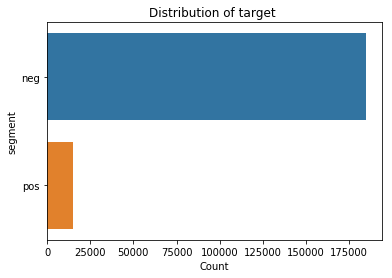

In [148]:
# Plotting distribution of Segments:
sns.countplot(y='segment', data=ht_dt)
plt.ylabel('segment')
plt.xlabel('Count')
plt.title('Distribution of target ')
plt.show()

In [150]:
dow_1_sum= train_data['dow_1'].sum()
dow_2_sum= train_data['dow_2'].sum()
dow_3_sum= train_data['dow_3'].sum()
dow_4_sum= train_data['dow_4'].sum()
dow_5_sum= train_data['dow_5'].sum()
dow_6_sum= train_data['dow_6'].sum()
dow_7_sum= train_data['dow_7'].sum()

In [151]:
dow_count_sum=[115826, 112601, 117451, 127420, 122205, 123738, 122773]

In [152]:
dow_count_sum

[115826, 112601, 117451, 127420, 122205, 123738, 122773]

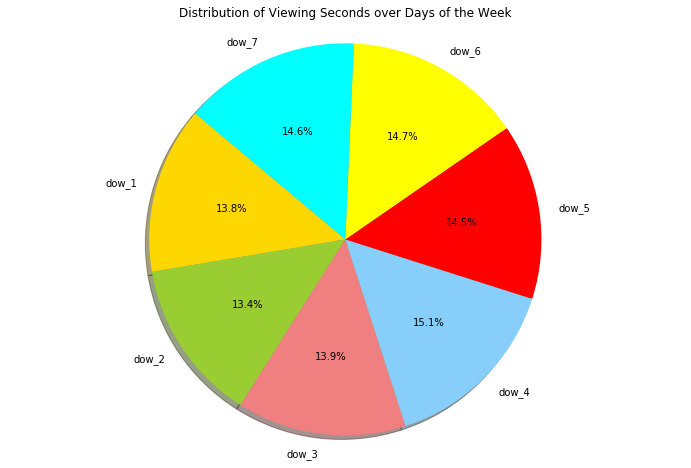

In [153]:
colors_dow = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red','yellow', 'cyan']
#explode = (0.1, 0, 0, 0)
plt.figure(figsize=(12,8))
plt.pie(dow_count_sum, labels=['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7'], colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Viewing Seconds over Days of the Week')
plt.show()

In [154]:
tod_1_sum= train_data['first_quarter'].sum()
tod_2_sum= train_data['second_quarter'].sum()
tod_3_sum= train_data['third_quarter'].sum()
tod_4_sum= train_data['fourth_quarter'].sum()

In [155]:
tod_count_sum = [126947, 344408, 542805, 556467]
tod_count_sum

[126947, 344408, 542805, 556467]

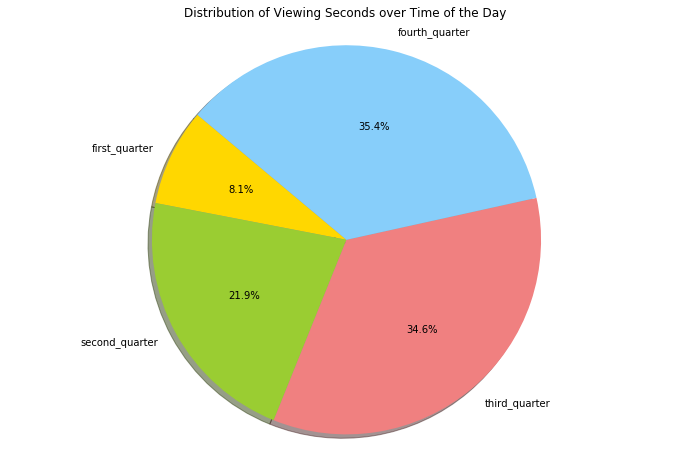

In [156]:
colors_tod = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)
plt.figure(figsize=(12,8))
plt.pie(tod_count_sum, labels=['first_quarter','second_quarter','third_quarter','fourth_quarter'], colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Viewing Seconds over Time of the Day')
plt.show()

In [182]:
genre_displaycol = ["Travel","Reality","Teen","Romance","Science","LiveTV","Comedy","Horror","Thriller","Kids","TalkShow","Awards","Drama","Wildlife","Action","Mythology","Documentary","Family","Crime","Sports"]
   

In [183]:
genre_count_sum = []
for col in genre_displaycol:
    col_val= train_data_v1[col].sum()
    genre_count_sum.append(col_val)
    

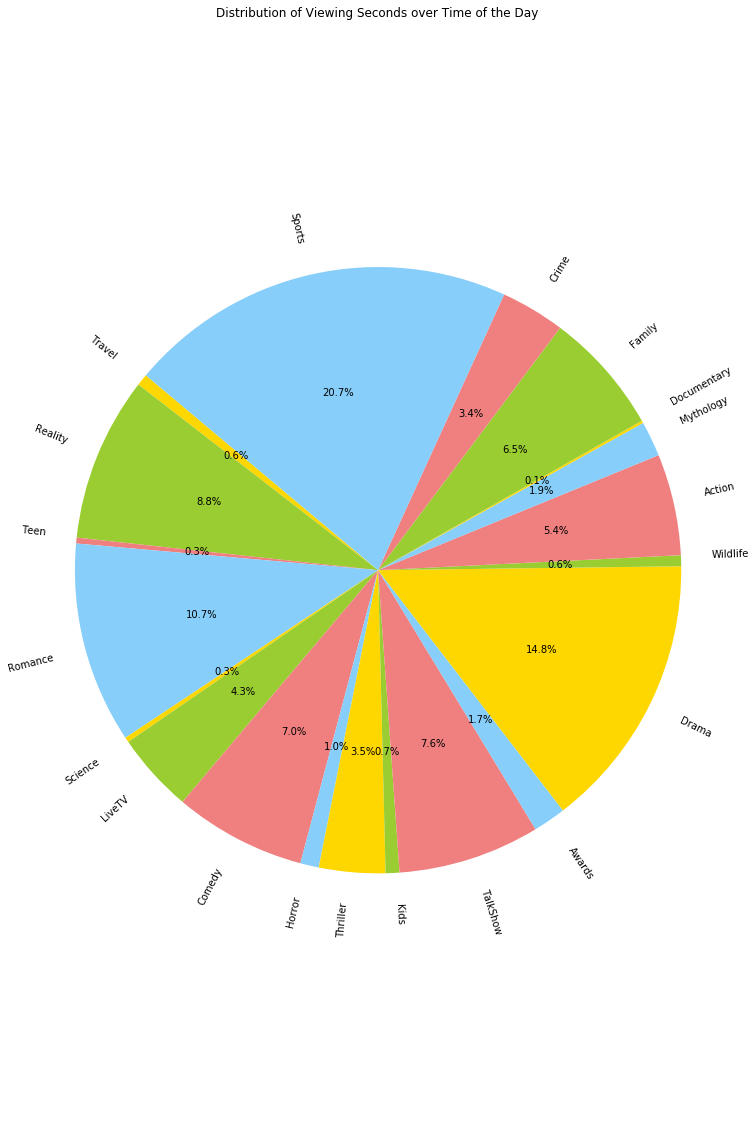

In [184]:
colors_tod = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)
plt.figure(figsize=(12,20))
plt.pie(genre_count_sum, labels=genre_displaycol, colors=colors_tod,
       autopct='%1.1f%%',  startangle=140, rotatelabels=True)
plt.axis('equal')
plt.title('Distribution of Viewing Seconds over Time of the Day')
plt.show()

In [185]:
city_dc_pkl = pickle.load(open("city_dc.pkl", "rb"))

In [186]:
final_cities_list_top_pkl = pickle.load(open("final_cities_list_display.pkl", "rb"))

In [220]:

top_city_display=[]
for i in final_cities_list_top_pkl:
    #top_city=0
    for j in range(len(city_dc_pkl)-):
        for k in range(j):
            if i==city_dc_pkl[j][k].keys():
                top_city+=city_dc_pkl[j][k][i]
                print(top_city)

IndexError: list index out of range

In [217]:
city_dc_pkl[0][0].keys()

dict_keys(['Haryana'])

In [192]:
final_cities_list_top_pkl

['Haryana',
 'NCT',
 'Rajasthan',
 'Maharashtra',
 'Tamil Nadu',
 'Telangana',
 'bangalore',
 'Karnataka',
 'Chandigarh',
 'Bangladesh',
 'Andhra Pradesh',
 'Madhya Pradesh',
 'Unknown',
 'Gujarat',
 'gandhinagar',
 'West Bengal',
 'Pakistan',
 'prabhadevi',
 'Haryana',
 'NCT',
 'Rajasthan',
 'Maharashtra',
 'Tamil Nadu',
 'Telangana',
 'bangalore',
 'Karnataka',
 'Chandigarh',
 'Bangladesh',
 'Andhra Pradesh',
 'Madhya Pradesh',
 'Unknown',
 'Gujarat',
 'gandhinagar',
 'West Bengal',
 'dubayy',
 'Pakistan',
 'prabhadevi']

In [204]:
train_data_v1['y_segment'] =  ht_dt['segment'].apply(lambda x: 0 if x == "neg" else 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [206]:
#train_data_v1.to_csv('model_data_v1.csv')